In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 1:2]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 2]

df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [11]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [8]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf').fit(X, y)

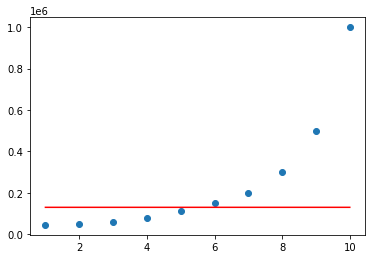

In [9]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color='r')
plt.show()

### The model is very bad because we did not scale the input. Most of the models like LinearRegression automatically scale the data, but perhaps the SVR model is not widely used, it doesn't scale the data by itself. Hence we have to manually scale the data

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

ValueError: Expected 2D array, got 1D array instead:
array=[  45000.   50000.   60000.   80000.  110000.  150000.  200000.  300000.
  500000. 1000000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
regressor = SVR(kernel='rbf').fit(X, y)

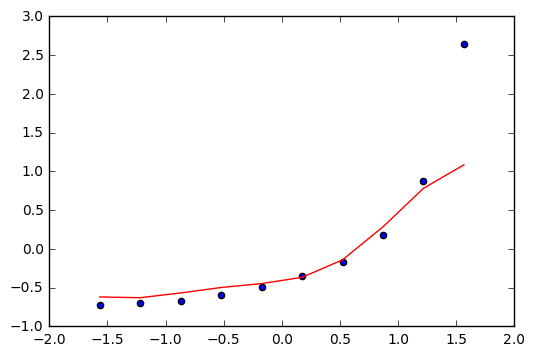

In [16]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color='r')
plt.show()

The prediction of the last point is a bit off because it is treated as an outlier by the default parameters set by SVR.

Now in order to predict a particular input, we first scale it, predict it, and inverse scale it to obtain the actual value

In [17]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

In [18]:
y_pred

array([ 170370.0204065])